# <font color='black'>Ensino Einstein</font>
## <font color='black'>Ciência de Dados e Informática para a Área da Saúde</font>
>### <font color='gray'>DATATHON</font>
>##### <font color='gray'>professor Rodrigo Signorini</font>

In [ ]:
# GRUPO 03 - DENISE CAMPOS (PO), BEATRIZ SILVA (APRESENTAÇÃO), BERNADETE CRISTINA ( DATA STORYTELLING), CASSIO MIRANDA (PBI), ERNANE SILVA (PBI), PÂMELA COSTA (CIÊNCIA)

### Definição do Problema de Negócio

Base de dados de valores financeiros dos procedimentos.

<font color='gray'>**IMPORTANTE**</font>

> Informações como valores de custo, características da passagem e do produto.

### Base de Dados

Como parte da estratégia elaborada para esse ESTÁGIO, a base de dados (em formato CSV) será disponibilizada em sala de aula no início das atividades. Fechar a conta por estimativa.

#### Estratégia Macro da Análise

> Endender problema de negócio;

> Preparar e estudar a base de dados;

> Realizar tratativas e preparação da base para análise descritiva;

> Análise descritiva;

> Preparação para algoritmo de previsão, dado o problema de negócio temos:

>> Algoritmo: Previsão do tempo do procedimento cirúrgico (antes do procedimento iniciar);

> Entregáveis: Painél de Dados (BI) com métricas e indicadores para acompanhamento gerencial do problema de negócio + conjunto de algoritmos de ML para apoio do processo + material de apresentação do projeto (pdf)

Import das bibliotecas a serem utilizadas

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from datetime import datetime, timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Montagem do espaço de trabalho



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/Datathon/estágio')

Leitura da Base de Dados

In [ ]:
df_raw1 = pd.read_csv('PGDSIS_estagio_v01_item+.CSV', sep=';', encoding="latin_1")
df_raw2 = pd.read_csv('PGDSIS_estagio_v01_item-.CSV', sep=';', encoding="latin_1")

In [ ]:
df_raw1.head()

,Prontuario2,DT_Nascimento,Sexo,Estado_Civil,Bairro,Cidade,Estado,Passagem2,DT_ADMISSAO,HR_ADMISSAO,DT_ALTA,HR_ALTA,Tipo_Admissao,CID,Desc_CID,Grupo_Diagnostico,Cod_ITEM,Desc_ITEM,DESC_CAT_ITEM,DESC_CAT_SERV,SUB_CAT_ITEM,FLG_OPME,Dt_Lancamento_Item,QTDE_ITEM,Valor_Custo_ITEM2
0,450644688,16/12/1957,Feminino,NaN,TAMBORE,SANTANA DE PARNAIBA,São Paulo,6725682912,11/12/2019,08:51,11/12/2019,23:59,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/12/2019,1,"11,86338462"
1,580296600,08/01/1984,Feminino,NaN,TAMBORE,SANTANA DE PARNAIBA,São Paulo,6716550672,06/12/2019,09:24,06/12/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,06/12/2019,1,"11,86338462"
2,678268656,20/01/1978,Masculino,NaN,ITAIM BIBI,SAO PAULO,São Paulo,6711620448,04/12/2019,10:22,04/12/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,04/12/2019,1,"11,86338462"
3,805588992,10/02/1989,Feminino,NaN,ALPHAVILLE CONDE II,BARUERI,São Paulo,6709449864,05/12/2019,07:25,05/12/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,05/12/2019,1,"11,86338462"
4,381520152,20/12/1973,Masculino,NaN,Alphaville,SANTANA DE PARNAIBA,São Paulo,6725498208,11/12/2019,07:27,11/12/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/12/2019,1,"11,86338462"


In [ ]:
df_raw2.head()

,Prontuario2,DT_Nascimento,Sexo,Estado_Civil,Bairro,Cidade,Estado,Passagem2,DT_ADMISSAO,HR_ADMISSAO,DT_ALTA,HR_ALTA,Tipo_Admissao,CID,Desc_CID,Grupo_Diagnostico
0,817256544,16/06/1995,Feminino,Solteiro(a),PONTA VERDE,MACEIO,Alagoas,6721486824,09/12/2019,14:16,09/12/2019,00:00,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas
1,418480608,21/04/1977,Masculino,Casado(a),PONTA VERDE,MACEIO,Alagoas,6579939600,25/09/2019,08:27,25/09/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas
2,418480608,21/04/1977,Masculino,Casado(a),PONTA VERDE,MACEIO,Alagoas,6574213464,23/09/2019,07:29,23/09/2019,00:00,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas
3,418480608,21/04/1977,Masculino,Casado(a),PONTA VERDE,MACEIO,Alagoas,6577332840,24/09/2019,08:01,24/09/2019,00:00,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas
4,418480608,21/04/1977,Masculino,Casado(a),PONTA VERDE,MACEIO,Alagoas,6438495336,10/07/2019,10:29,10/07/2019,00:00,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas


In [ ]:
df_raw1.shape

(921727, 25)

In [ ]:
df_raw2.shape

(942051, 16)

Redução da Base de Dados pela exclusão das observações nulas

In [ ]:
df_raw1.notnull().sum()

Prontuario2           921727
DT_Nascimento         921727
Sexo                  921727
Estado_Civil          508620
Bairro                919738
Cidade                921727
Estado                921727
Passagem2             921727
DT_ADMISSAO           921727
HR_ADMISSAO           921727
DT_ALTA               921727
HR_ALTA               921727
Tipo_Admissao         921727
CID                   921727
Desc_CID              921727
Grupo_Diagnostico     921727
Cod_ITEM              921727
Desc_ITEM             921727
DESC_CAT_ITEM         921727
DESC_CAT_SERV         921727
SUB_CAT_ITEM          921727
FLG_OPME              921727
Dt_Lancamento_Item    921727
QTDE_ITEM             921727
Valor_Custo_ITEM2     869426
dtype: int64

In [ ]:
df_raw1 = df_raw1[df_raw1['Valor_Custo_ITEM2'].notna()]

In [ ]:
df_raw1 = df_raw1.drop(['Estado_Civil'], axis=1)

In [ ]:
df_raw1.shape

(869426, 24)

In [ ]:
df_raw1.notnull().sum()

Prontuario2           869426
DT_Nascimento         869426
Sexo                  869426
Bairro                867523
Cidade                869426
Estado                869426
Passagem2             869426
DT_ADMISSAO           869426
HR_ADMISSAO           869426
DT_ALTA               869426
HR_ALTA               869426
Tipo_Admissao         869426
CID                   869426
Desc_CID              869426
Grupo_Diagnostico     869426
Cod_ITEM              869426
Desc_ITEM             869426
DESC_CAT_ITEM         869426
DESC_CAT_SERV         869426
SUB_CAT_ITEM          869426
FLG_OPME              869426
Dt_Lancamento_Item    869426
QTDE_ITEM             869426
Valor_Custo_ITEM2     869426
dtype: int64

In [ ]:
df_raw1 = df_raw1[df_raw1['Bairro'].notna()]

In [ ]:
df_raw1.shape

(867523, 24)

In [ ]:
df_raw1.notnull().sum()

Prontuario2           867523
DT_Nascimento         867523
Sexo                  867523
Bairro                867523
Cidade                867523
Estado                867523
Passagem2             867523
DT_ADMISSAO           867523
HR_ADMISSAO           867523
DT_ALTA               867523
HR_ALTA               867523
Tipo_Admissao         867523
CID                   867523
Desc_CID              867523
Grupo_Diagnostico     867523
Cod_ITEM              867523
Desc_ITEM             867523
DESC_CAT_ITEM         867523
DESC_CAT_SERV         867523
SUB_CAT_ITEM          867523
FLG_OPME              867523
Dt_Lancamento_Item    867523
QTDE_ITEM             867523
Valor_Custo_ITEM2     867523
dtype: int64

In [ ]:
df_raw2.notnull().sum()

Prontuario2          942051
DT_Nascimento        942038
Sexo                 942051
Estado_Civil         415324
Bairro               940479
Cidade               942051
Estado               942051
Passagem2            942051
DT_ADMISSAO          942051
HR_ADMISSAO          942051
DT_ALTA              942051
HR_ALTA              942051
Tipo_Admissao        942051
CID                  942051
Desc_CID             942051
Grupo_Diagnostico    942051
dtype: int64

In [ ]:
df_raw2 = df_raw2[df_raw2['Bairro'].notna()]

In [ ]:
df_raw2 = df_raw2.drop(['Estado_Civil'], axis=1)

In [ ]:
df_raw2.notnull().sum()

Prontuario2          940479
DT_Nascimento        940466
Sexo                 940479
Bairro               940479
Cidade               940479
Estado               940479
Passagem2            940479
DT_ADMISSAO          940479
HR_ADMISSAO          940479
DT_ALTA              940479
HR_ALTA              940479
Tipo_Admissao        940479
CID                  940479
Desc_CID             940479
Grupo_Diagnostico    940479
dtype: int64

In [ ]:
df_raw2 = df_raw2[df_raw2['DT_Nascimento'].notna()]

In [ ]:
df_raw2.shape

(940466, 15)

In [ ]:
df_raw2.notnull().sum()

Prontuario2          940466
DT_Nascimento        940466
Sexo                 940466
Bairro               940466
Cidade               940466
Estado               940466
Passagem2            940466
DT_ADMISSAO          940466
HR_ADMISSAO          940466
DT_ALTA              940466
HR_ALTA              940466
Tipo_Admissao        940466
CID                  940466
Desc_CID             940466
Grupo_Diagnostico    940466
dtype: int64

Cálculo da diferença da data de entrada pela data de saída em horas

In [ ]:
df_raw1['tempo_passagem'] = (pd.to_datetime(df_raw1.DT_ALTA, format='%d/%m/%Y') - pd.to_datetime(df_raw1.DT_ADMISSAO, format='%d/%m/%Y')).dt.days

In [ ]:
df_raw2['tempo_passagem'] = (pd.to_datetime(df_raw2.DT_ALTA, format='%d/%m/%Y') - pd.to_datetime(df_raw2.DT_ADMISSAO, format='%d/%m/%Y')).dt.days

In [ ]:
df_raw1['idade'] = ((datetime.now() - pd.to_datetime(df_raw1['DT_Nascimento'])).dt.days/365).astype(int)

In [ ]:
df_raw2['idade'] = ((datetime.now() - pd.to_datetime(df_raw2['DT_Nascimento'])).dt.days/365).astype(int)

In [ ]:
df_raw1['HR_ALTA'] = pd.to_datetime(df_raw1['HR_ALTA'], format='%H:%M').dt.hour

In [ ]:
def convert1(row):
  if int(row['HR_ALTA']) < 13 and int(row['HR_ALTA']) > 3:
      return 'Manhã'
  elif int(row['HR_ALTA']) > 12 and int(row['HR_ALTA']) < 19:
      return 'Tarde'
  elif int(row['HR_ALTA']) < 4 or int(row['HR_ALTA']) > 18:
      return 'Noite'

df_raw1['HR_ALTA'] = df_raw1.apply(convert1, axis=1)

In [ ]:
df_raw2['HR_ALTA'] = pd.to_datetime(df_raw2['HR_ALTA'], format='%H:%M').dt.hour

In [ ]:
def convert2(row):
  if int(row['HR_ALTA']) < 13 and int(row['HR_ALTA']) > 3:
      return 'Manhã'
  elif int(row['HR_ALTA']) > 12 and int(row['HR_ALTA']) < 19:
      return 'Tarde'
  elif int(row['HR_ALTA']) < 4 or int(row['HR_ALTA']) > 18:
      return 'Noite'

df_raw2['HR_ALTA'] = df_raw2.apply(convert2, axis=1)

In [ ]:
df_raw1['HT_ADMISSAO'] = pd.to_datetime(df_raw1['HR_ADMISSAO'], format='%H:%M').dt.hour

In [ ]:
def convert3(row):
  if int(row['HT_ADMISSAO']) < 13 and int(row['HT_ADMISSAO']) > 3:
      return 'Manhã'
  elif int(row['HT_ADMISSAO']) > 12 and int(row['HT_ADMISSAO']) < 19:
      return 'Tarde'
  elif int(row['HT_ADMISSAO']) < 4 or int(row['HT_ADMISSAO']) > 18:
      return 'Noite'

df_raw1['HT_ADMISSAO'] = df_raw1.apply(convert3, axis=1)

In [ ]:
df_raw2['HT_ADMISSAO'] = pd.to_datetime(df_raw2['HR_ADMISSAO'], format='%H:%M').dt.hour

In [ ]:
def convert4(row):
  if int(row['HT_ADMISSAO']) < 13 and int(row['HT_ADMISSAO']) > 3:
      return 'Manhã'
  elif int(row['HT_ADMISSAO']) > 12 and int(row['HT_ADMISSAO']) < 19:
      return 'Tarde'
  elif int(row['HT_ADMISSAO']) < 4 or int(row['HT_ADMISSAO']) > 18:
      return 'Noite'

df_raw2['HT_ADMISSAO'] = df_raw2.apply(convert4, axis=1)

In [ ]:
df_raw1['Valor_Custo_ITEM2'] = df_raw1['Valor_Custo_ITEM2'].str.replace('R$', '')
df_raw1['Valor_Custo_ITEM2'] = df_raw1['Valor_Custo_ITEM2'].str.replace(',', '.').astype(float)
df_raw1['Valor_Custo_ITEM2']

0         11.863385
1         11.863385
2         11.863385
3         11.863385
4         11.863385
            ...    
921714    12.173538
921723     0.000000
921724     0.000000
921725     0.000000
921726     0.000000
Name: Valor_Custo_ITEM2, Length: 867523, dtype: float64

Remoção dos valores negativos (onde a data de saída é menor que a data de entrada)

In [ ]:
df_raw1 = df_raw1[df_raw1['Valor_Custo_ITEM2'] > 0] 

In [ ]:
df_raw1.shape

(822954, 27)

In [ ]:
df_raw1.notnull().sum()

Prontuario2           822954
DT_Nascimento         822954
Sexo                  822954
Bairro                822954
Cidade                822954
Estado                822954
Passagem2             822954
DT_ADMISSAO           822954
HR_ADMISSAO           822954
DT_ALTA               822954
HR_ALTA               822954
Tipo_Admissao         822954
CID                   822954
Desc_CID              822954
Grupo_Diagnostico     822954
Cod_ITEM              822954
Desc_ITEM             822954
DESC_CAT_ITEM         822954
DESC_CAT_SERV         822954
SUB_CAT_ITEM          822954
FLG_OPME              822954
Dt_Lancamento_Item    822954
QTDE_ITEM             822954
Valor_Custo_ITEM2     822954
tempo_passagem        822954
idade                 822954
HT_ADMISSAO           822954
dtype: int64

Tratativas dos outlyers

In [ ]:
df_conf1 = df_raw1.groupby(by=['Desc_ITEM']).mean()
df_conf2 = df_raw1.groupby(by=['Desc_ITEM']).median()
df_conf1 = df_conf1.reset_index()
df_conf2 = df_conf2.reset_index()

In [ ]:
df_conf1 = df_conf1[['Valor_Custo_ITEM2', 'Desc_ITEM']]
df_conf2 = df_conf2[['Valor_Custo_ITEM2', 'Desc_ITEM']]

In [ ]:
df_conf = df_conf1.merge(df_conf2, on='Desc_ITEM')

In [ ]:
df_conf['Outlyer'] = ((df_conf['Valor_Custo_ITEM2_x'] - df_conf['Valor_Custo_ITEM2_y'])/df_conf['Valor_Custo_ITEM2_x'])*100

In [ ]:
df_conf['Outlyer'] = df_conf['Outlyer'].abs()
df_conf_out = df_conf[df_conf['Outlyer'] > 95]

In [ ]:
df_test = df_raw1.merge(df_conf_out, on='Desc_ITEM')

In [ ]:
df_test[df_test['Outlyer']>95]

,Prontuario2,DT_Nascimento,Sexo,Bairro,Cidade,Estado,Passagem2,DT_ADMISSAO,HR_ADMISSAO,DT_ALTA,HR_ALTA,Tipo_Admissao,CID,Desc_CID,Grupo_Diagnostico,Cod_ITEM,Desc_ITEM,DESC_CAT_ITEM,DESC_CAT_SERV,SUB_CAT_ITEM,FLG_OPME,Dt_Lancamento_Item,QTDE_ITEM,Valor_Custo_ITEM2,tempo_passagem,idade,HT_ADMISSAO,Valor_Custo_ITEM2_x,Valor_Custo_ITEM2_y,Outlyer
0,751305672,02/08/1965,Feminino,JARDIM MARAJOARA,SAO PAULO,São Paulo,6731072400,13/12/2019,11:09,13/12/2019,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,13/12/2019,1,46.174154,0,56,Manhã,17801.912234,46.174154,99.740623
1,300804192,24/11/1975,Feminino,VILA MONUMENTO,SAO PAULO,São Paulo,6726278520,11/12/2019,11:37,01/01/1900,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,11/12/2019,1,46.174154,-43808,45,Manhã,17801.912234,46.174154,99.740623
2,552261216,07/04/1987,Feminino,CHACARA AGRINDUS,TABOAO DA SERRA,São Paulo,6686725032,06/12/2019,09:00,06/12/2019,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,06/12/2019,1,46.174154,0,34,Manhã,17801.912234,46.174154,99.740623
3,784639440,21/07/1980,Masculino,BAETA NEVES,SAO BERNARDO DO CAMPO,São Paulo,6674283096,04/12/2019,09:30,04/12/2019,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,04/12/2019,1,46.174154,0,41,Manhã,17801.912234,46.174154,99.740623
4,335965344,21/12/1974,Feminino,PARAISO,SAO PAULO,São Paulo,6730948848,13/12/2019,10:31,13/12/2019,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,13/12/2019,1,46.174154,0,46,Manhã,17801.912234,46.174154,99.740623
5,511011696,25/01/1973,Masculino,CIDADE ARISTON ESTELA AZEVEDO,CARAPICUIBA,São Paulo,6681798864,03/12/2019,13:40,03/12/2019,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,03/12/2019,1,46.174154,0,48,Tarde,17801.912234,46.174154,99.740623
6,616585320,04/09/1985,Feminino,JARDIM MARIA SAMPAIO,SAO PAULO,São Paulo,6689043192,02/12/2019,08:20,02/12/2019,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,02/12/2019,1,46.174154,0,36,Manhã,17801.912234,46.174154,99.740623
7,362134032,16/04/1948,Masculino,BUTANTA,SAO PAULO,São Paulo,6724472976,10/12/2019,15:28,27/12/2019,Noite,INTERNADO,L08,Outras infecções localizadas da pele e do teci...,Dermatologia e Cirurgia Plástica,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,20/12/2019,1,46.174154,17,73,Tarde,17801.912234,46.174154,99.740623
8,171166008,10/06/1966,Masculino,VILA BRASIL,SAO PAULO,São Paulo,6722025648,09/12/2019,16:31,09/12/2019,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,09/12/2019,1,46.174154,0,54,Tarde,17801.912234,46.174154,99.740623
9,119370264,09/09/1943,Feminino,CAMPO BELO,SAO PAULO,São Paulo,6727107816,11/12/2019,15:39,17/12/2019,Manhã,INTERNADO,J18,Pneumonia por microorganismo não especificada,Pneumologia e Cirurgia Torácica,104680,"CRONOBE 5.000MCG AP 2,5ML",Medicamentos,MEDICAMENTOS,Medicamentos Gerais,N,17/12/2019,1,46.174154,6,78,Tarde,17801.912234,46.174154,99.740623


In [ ]:
# verificação
#df_raw1[df_raw1['QTDE_ITEM'] == '5000']
df_raw1 = df_raw1.drop([754807])

In [ ]:
df_raw1

,Prontuario2,DT_Nascimento,Sexo,Bairro,Cidade,Estado,Passagem2,DT_ADMISSAO,HR_ADMISSAO,DT_ALTA,HR_ALTA,Tipo_Admissao,CID,Desc_CID,Grupo_Diagnostico,Cod_ITEM,Desc_ITEM,DESC_CAT_ITEM,DESC_CAT_SERV,SUB_CAT_ITEM,FLG_OPME,Dt_Lancamento_Item,QTDE_ITEM,Valor_Custo_ITEM2,tempo_passagem,idade,HT_ADMISSAO
0,450644688,16/12/1957,Feminino,TAMBORE,SANTANA DE PARNAIBA,São Paulo,6725682912,11/12/2019,08:51,11/12/2019,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/12/2019,1,11.863385,0,63,Manhã
1,580296600,08/01/1984,Feminino,TAMBORE,SANTANA DE PARNAIBA,São Paulo,6716550672,06/12/2019,09:24,06/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,06/12/2019,1,11.863385,0,37,Manhã
2,678268656,20/01/1978,Masculino,ITAIM BIBI,SAO PAULO,São Paulo,6711620448,04/12/2019,10:22,04/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,04/12/2019,1,11.863385,0,43,Manhã
3,805588992,10/02/1989,Feminino,ALPHAVILLE CONDE II,BARUERI,São Paulo,6709449864,05/12/2019,07:25,05/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,05/12/2019,1,11.863385,0,31,Manhã
4,381520152,20/12/1973,Masculino,Alphaville,SANTANA DE PARNAIBA,São Paulo,6725498208,11/12/2019,07:27,11/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/12/2019,1,11.863385,0,47,Manhã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921710,304752552,29/01/1960,Feminino,TERRAS DE PIRACICABA,PIRACICABA,São Paulo,6656579280,02/12/2019,06:09,02/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,TXAC,Envio de Laudos Sedex,Servicos Administrativos,SERVICOS,Servicos Administrativos,N,30/11/2019,1,202.026462,0,61,Manhã
921711,95854824,29/10/1955,Masculino,GRANJA VIANA II,COTIA,São Paulo,6687953376,02/12/2019,09:39,02/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,TXAC,Envio de Laudos Sedex,Servicos Administrativos,SERVICOS,Servicos Administrativos,N,30/11/2019,1,202.026462,0,65,Manhã
921712,773645184,09/05/1987,Feminino,ALTO DE PINHEIROS,SAO PAULO,São Paulo,6616855752,12/12/2019,05:00,01/01/1900,Noite,INTERNADO,Não Informado,Não Informado,NÃO INFORMADO,LDHL,DHL - DESIDROGENASE LACTICA,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/11/2019,1,11.979692,-43809,34,Manhã
921713,773645184,09/05/1987,Feminino,ALTO DE PINHEIROS,SAO PAULO,São Paulo,6616855752,12/12/2019,05:00,01/01/1900,Noite,INTERNADO,Não Informado,Não Informado,NÃO INFORMADO,LTGO,TGO-AST - ASPARTATO AMINOTRANSFERASE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/11/2019,1,13.801846,-43809,34,Manhã


In [ ]:
def convert5(row):
  if int(row['tempo_passagem']) < 0:
      return 'Passagem Aberta'
  elif int(row['tempo_passagem']) == 0:
      return '< 1'
  elif int(row['tempo_passagem']) > 0:
      return row['tempo_passagem']

df_raw2['tempo_permanencia_dias'] = df_raw2.apply(convert5, axis=1)

In [ ]:
df_raw1['tempo_permanencia_dias'] = df_raw1.apply(convert5, axis=1)

In [ ]:
df_raw1

,Prontuario2,DT_Nascimento,Sexo,Bairro,Cidade,Estado,Passagem2,DT_ADMISSAO,HR_ADMISSAO,DT_ALTA,HR_ALTA,Tipo_Admissao,CID,Desc_CID,Grupo_Diagnostico,Cod_ITEM,Desc_ITEM,DESC_CAT_ITEM,DESC_CAT_SERV,SUB_CAT_ITEM,FLG_OPME,Dt_Lancamento_Item,QTDE_ITEM,Valor_Custo_ITEM2,tempo_passagem,idade,HT_ADMISSAO,tempo_permanencia_dias
0,450644688,16/12/1957,Feminino,TAMBORE,SANTANA DE PARNAIBA,São Paulo,6725682912,11/12/2019,08:51,11/12/2019,Noite,EXTERNO,Não Informado,Não Informado,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/12/2019,1,11.863385,0,63,Manhã,< 1
1,580296600,08/01/1984,Feminino,TAMBORE,SANTANA DE PARNAIBA,São Paulo,6716550672,06/12/2019,09:24,06/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,06/12/2019,1,11.863385,0,37,Manhã,< 1
2,678268656,20/01/1978,Masculino,ITAIM BIBI,SAO PAULO,São Paulo,6711620448,04/12/2019,10:22,04/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,04/12/2019,1,11.863385,0,43,Manhã,< 1
3,805588992,10/02/1989,Feminino,ALPHAVILLE CONDE II,BARUERI,São Paulo,6709449864,05/12/2019,07:25,05/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,05/12/2019,1,11.863385,0,31,Manhã,< 1
4,381520152,20/12/1973,Masculino,Alphaville,SANTANA DE PARNAIBA,São Paulo,6725498208,11/12/2019,07:27,11/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,LGLI,GLICOSE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/12/2019,1,11.863385,0,47,Manhã,< 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921710,304752552,29/01/1960,Feminino,TERRAS DE PIRACICABA,PIRACICABA,São Paulo,6656579280,02/12/2019,06:09,02/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,TXAC,Envio de Laudos Sedex,Servicos Administrativos,SERVICOS,Servicos Administrativos,N,30/11/2019,1,202.026462,0,61,Manhã,< 1
921711,95854824,29/10/1955,Masculino,GRANJA VIANA II,COTIA,São Paulo,6687953376,02/12/2019,09:39,02/12/2019,Noite,EXTERNO,Z01,Outros exames e investigações especiais de pes...,Unidades Diagnósticas,TXAC,Envio de Laudos Sedex,Servicos Administrativos,SERVICOS,Servicos Administrativos,N,30/11/2019,1,202.026462,0,65,Manhã,< 1
921712,773645184,09/05/1987,Feminino,ALTO DE PINHEIROS,SAO PAULO,São Paulo,6616855752,12/12/2019,05:00,01/01/1900,Noite,INTERNADO,Não Informado,Não Informado,NÃO INFORMADO,LDHL,DHL - DESIDROGENASE LACTICA,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/11/2019,1,11.979692,-43809,34,Manhã,Passagem Aberta
921713,773645184,09/05/1987,Feminino,ALTO DE PINHEIROS,SAO PAULO,São Paulo,6616855752,12/12/2019,05:00,01/01/1900,Noite,INTERNADO,Não Informado,Não Informado,NÃO INFORMADO,LTGO,TGO-AST - ASPARTATO AMINOTRANSFERASE,Laboratorio Analises Clinicas,EXAMES,Bioquimica,N,11/11/2019,1,13.801846,-43809,34,Manhã,Passagem Aberta


In [ ]:
df_raw1['Valor_Custo_ITEM2'] = df_raw1['Valor_Custo_ITEM2'].astype(str)

Criação da base para PBI (acomanhamento das métricas e indicadores facilitado da equipe)

-----------------

ALGORITMO: Inicia a tratativa descritiva para preparação da base com fim para o algoritmo

In [ ]:
df_ml = df_raw1[df_raw1['tempo_permanencia_dias'] != 'Passagem Aberta'] #Valores válidos
df_ml = df_ml[df_ml['Tipo_Admissao'] == 'INTERNADO'] #Valores válidos
df_ml.head(2)

,Prontuario2,DT_Nascimento,Sexo,Bairro,Cidade,Estado,Passagem2,DT_ADMISSAO,HR_ADMISSAO,DT_ALTA,HR_ALTA,Tipo_Admissao,CID,Desc_CID,Grupo_Diagnostico,Cod_ITEM,Desc_ITEM,DESC_CAT_ITEM,DESC_CAT_SERV,SUB_CAT_ITEM,FLG_OPME,Dt_Lancamento_Item,QTDE_ITEM,Valor_Custo_ITEM2,tempo_passagem,idade,HT_ADMISSAO,tempo_permanencia_dias
7687,816659376,04/12/1964,Masculino,CENTRO,PIRACICABA,São Paulo,6718455744,07/12/2019,02:58,18/12/2019,Noite,INTERNADO,B18,Hepatite viral crônica,Transplantes,CS14,SERINGA DESC 10ML LUER LOCK 990172,Materiais,MATERIAIS,Materiais,N,16/12/2019,8,11.47569231,11,57,Noite,11
7688,816659376,04/12/1964,Masculino,CENTRO,PIRACICABA,São Paulo,6718455744,07/12/2019,02:58,18/12/2019,Noite,INTERNADO,B18,Hepatite viral crônica,Transplantes,HL19,LUVA P/PROC LATEX N EST S/TALCO MD,Materiais,MATERIAIS,Materiais,N,15/12/2019,50,98.86153846,11,57,Noite,11


In [ ]:
df_ml1 = df_raw2[df_raw2['tempo_permanencia_dias'] != 'Passagem Aberta'] #Valores válidos
df_ml1 = df_ml1[df_ml1['Tipo_Admissao'] == 'INTERNADO'] #Valores válidos
df_ml1.head(2)

,Prontuario2,DT_Nascimento,Sexo,Bairro,Cidade,Estado,Passagem2,DT_ADMISSAO,HR_ADMISSAO,DT_ALTA,HR_ALTA,Tipo_Admissao,CID,Desc_CID,Grupo_Diagnostico,tempo_passagem,idade,HT_ADMISSAO,tempo_permanencia_dias
86,389909832,21/12/2008,Masculino,JARDIM MOYSES MIGUEL HADDAD,SAO JOSE DO RIO PRETO,São Paulo,6664395192,08/11/2019,07:58,08/11/2019,Noite,INTERNADO,M85,Outros transtornos da densidade e da estrutura...,Pediatria,0,12,Manhã,< 1
98,753761424,10/03/1978,Feminino,CONDOMINIO DEBORA CRISTINA,SAO JOSE DO RIO PRETO,São Paulo,6494460960,14/08/2019,06:09,16/08/2019,Manhã,INTERNADO,C50,Neoplasia maligna da mama,Oncologia,2,42,Manhã,2


Seleção apenas das variáveis que foram selecionadas para utilização e reordenação do dataset

In [ ]:
df_ml = df_ml[['Sexo', 'Estado',	'Grupo_Diagnostico',	'idade',	'HT_ADMISSAO',	'tempo_permanencia_dias', 'Valor_Custo_ITEM2']]

In [ ]:
df_ml1 = df_ml1[['Sexo', 'Estado',	'Grupo_Diagnostico',	'idade',	'HT_ADMISSAO',	'tempo_permanencia_dias']]

In [ ]:
df_ml.head(5)

,Sexo,Estado,Grupo_Diagnostico,idade,HT_ADMISSAO,tempo_permanencia_dias,Valor_Custo_ITEM2
7687,Masculino,São Paulo,Transplantes,57,Noite,11,11.47569231
7688,Masculino,São Paulo,Transplantes,57,Noite,11,98.86153846
7689,Masculino,São Paulo,Transplantes,57,Noite,11,24.15323077
7690,Masculino,São Paulo,Transplantes,57,Noite,11,23.41661538
7691,Masculino,São Paulo,Transplantes,57,Noite,11,14.92615385


> Tranformação da variável sexo em dummy (como é uma variável binária, ao transformar em dummy, "sexo_F" e "sexo_M" podemos excluir uma delas, pois é complementar uma da outra, para evitar problemas de colinearidade. Ficando assim, apenas com a variável sexo)

In [ ]:
def convert6(row):
  if str(row['tempo_permanencia_dias']) == '< 1':
      return 0
  else:
      return row['tempo_permanencia_dias']
 
df_ml['tempo_permanencia_dias'] = df_ml.apply(convert6, axis=1)

In [ ]:
df_ml1['tempo_permanencia_dias'] = df_ml1.apply(convert6, axis=1)

In [ ]:
def convert7(row):
  if str(row['Sexo']) == 'Feminino':
      return 0
  else:
      return 1

df_ml['Sexo'] = df_ml.apply(convert7, axis=1)

In [ ]:
df_ml1['Sexo'] = df_ml1.apply(convert7, axis=1)

In [ ]:
df_ml.head(5)

,Sexo,Estado,Grupo_Diagnostico,idade,HT_ADMISSAO,tempo_permanencia_dias,Valor_Custo_ITEM2
7687,1,São Paulo,Transplantes,57,Noite,11,11.47569231
7688,1,São Paulo,Transplantes,57,Noite,11,98.86153846
7689,1,São Paulo,Transplantes,57,Noite,11,24.15323077
7690,1,São Paulo,Transplantes,57,Noite,11,23.41661538
7691,1,São Paulo,Transplantes,57,Noite,11,14.92615385


In [ ]:
df_ml.Sexo.value_counts()

0    230604
1    178221
Name: Sexo, dtype: int64

Tranformação da variável tipo_passagem em dummy 

In [ ]:
# visualizando as categorias
df_ml.HT_ADMISSAO.value_counts()

Manhã    203123
Tarde    108692
Noite     97010
Name: HT_ADMISSAO, dtype: int64

In [ ]:
# criando as variáveis dummies
df_dummy = pd.get_dummies(df_ml['HT_ADMISSAO'], prefix='HT', prefix_sep='_')
df_dummy.head()

,HT_Manhã,HT_Noite,HT_Tarde
7687,0,1,0
7688,0,1,0
7689,0,1,0
7690,0,1,0
7691,0,1,0


In [ ]:
# criando as variáveis dummies
df_dummy1 = pd.get_dummies(df_ml1['HT_ADMISSAO'], prefix='HT', prefix_sep='_')
df_dummy1.head()

,HT_Manhã,HT_Noite,HT_Tarde
86,1,0,0
98,1,0,0
120,1,0,0
128,1,0,0
142,0,1,0


In [ ]:
# concatenando os DataFrames
df_ml = pd.concat([df_ml, df_dummy], axis=1)
print(df_ml.shape)
display(df_ml.head())

(408825, 10)


,Sexo,Estado,Grupo_Diagnostico,idade,HT_ADMISSAO,tempo_permanencia_dias,Valor_Custo_ITEM2,HT_Manhã,HT_Noite,HT_Tarde
7687,1,São Paulo,Transplantes,57,Noite,11,11.47569231,0,1,0
7688,1,São Paulo,Transplantes,57,Noite,11,98.86153846,0,1,0
7689,1,São Paulo,Transplantes,57,Noite,11,24.15323077,0,1,0
7690,1,São Paulo,Transplantes,57,Noite,11,23.41661538,0,1,0
7691,1,São Paulo,Transplantes,57,Noite,11,14.92615385,0,1,0


In [ ]:
# concatenando os DataFrames
df_ml1 = pd.concat([df_ml1, df_dummy1], axis=1)
print(df_ml1.shape)
display(df_ml1.head())

(34105, 9)


,Sexo,Estado,Grupo_Diagnostico,idade,HT_ADMISSAO,tempo_permanencia_dias,HT_Manhã,HT_Noite,HT_Tarde
86,1,São Paulo,Pediatria,12,Manhã,0,1,0,0
98,0,São Paulo,Oncologia,42,Manhã,2,1,0,0
120,1,São Paulo,Otorrinolaringologia e Cirurgia Buco-Maxilo,7,Manhã,0,1,0,0
128,0,São Paulo,Dermatologia e Cirurgia Plástica,38,Manhã,1,1,0,0
142,1,São Paulo,Pediatria,5,Noite,1,0,1,0


In [ ]:
# removendo uma variável
df_ml = df_ml.drop(['HT_Tarde'], axis=1)
df_ml1 = df_ml1.drop(['HT_Tarde'], axis=1)

Tranformação da variável tecnica_cirurgica em dummy

In [ ]:
# visualizando as categorias
df_ml.Grupo_Diagnostico.value_counts()

Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral    44817
Pneumologia e Cirurgia Torácica                                    36011
Reumatologia e Ortopedia                                           33672
Nefrologia e Urologia                                              30352
Moléstias Infecciosas                                              29431
Oncologia                                                          28988
Unidades Diagnósticas                                              27371
Maternidade                                                        26564
Cardiologia                                                        24842
Otorrinolaringologia e Cirurgia Buco-Maxilo                        20247
Pediatria                                                          17416
Neurologia                                                         14695
Dermatologia e Cirurgia Plástica                                   14335
Ginecologia                                        

In [ ]:
# criando as variáveis dummies
df_dummy = pd.get_dummies(df_ml['Grupo_Diagnostico'], prefix='gd', prefix_sep='_')
df_dummy.head()

,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_NÃO INFORMADO,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular
7687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# criando as variáveis dummies
df_dummy1 = pd.get_dummies(df_ml1['Grupo_Diagnostico'], prefix='gd', prefix_sep='_')
df_dummy1.head()

,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Moradores,gd_Nefrologia e Urologia,gd_Neurologia,gd_NÃO INFORMADO,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular
86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
128,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# concatenando os DataFrames
df_ml = pd.concat([df_ml, df_dummy], axis=1)
print(df_ml.shape)
display(df_ml.head())

(408825, 34)


,Sexo,Estado,Grupo_Diagnostico,idade,HT_ADMISSAO,tempo_permanencia_dias,Valor_Custo_ITEM2,HT_Manhã,HT_Noite,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_NÃO INFORMADO,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular
7687,1,São Paulo,Transplantes,57,Noite,11,11.47569231,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7688,1,São Paulo,Transplantes,57,Noite,11,98.86153846,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7689,1,São Paulo,Transplantes,57,Noite,11,24.15323077,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7690,1,São Paulo,Transplantes,57,Noite,11,23.41661538,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7691,1,São Paulo,Transplantes,57,Noite,11,14.92615385,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# concatenando os DataFrames
df_ml1 = pd.concat([df_ml1, df_dummy], axis=1)
print(df_ml1.shape)
display(df_ml1.head())

(428101, 33)


,Sexo,Estado,Grupo_Diagnostico,idade,HT_ADMISSAO,tempo_permanencia_dias,HT_Manhã,HT_Noite,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_NÃO INFORMADO,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular
86,1.0,São Paulo,Pediatria,12.0,Manhã,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0.0,São Paulo,Oncologia,42.0,Manhã,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,1.0,São Paulo,Otorrinolaringologia e Cirurgia Buco-Maxilo,7.0,Manhã,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,0.0,São Paulo,Dermatologia e Cirurgia Plástica,38.0,Manhã,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,1.0,São Paulo,Pediatria,5.0,Noite,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# removendo uma variável
df_ml = df_ml.drop(['gd_NÃO INFORMADO'], axis=1)
# removendo uma variável
df_ml1 = df_ml1.drop(['gd_NÃO INFORMADO'], axis=1)

Tranformação da variável asa em dummy 

In [ ]:
# visualizando as categorias
df_ml.Estado.value_counts()

São Paulo             389730
Goiás                   2504
Santa Catarina          2459
Paraná                  1998
Rio de Janeiro          1878
Minas Gerais            1772
Piauí                   1553
Amazonas                1487
Distrito Federal        1244
Pará                    1046
Alagoas                 1042
Pernambuco               496
Mato Grosso do Sul       443
Maranhão                 244
Bahia                    230
Mato Grosso              166
Acre                     123
Espírito Santo           121
Rio Grande do Sul        111
Paraíba                   99
Tocantins                 79
Name: Estado, dtype: int64

In [ ]:
# criando as variáveis dummies
df_dummy = pd.get_dummies(df_ml['Estado'], prefix='UF', prefix_sep='_')
df_dummy.head()

,UF_Acre,UF_Alagoas,UF_Amazonas,UF_Bahia,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Santa Catarina,UF_São Paulo,UF_Tocantins
7687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# criando as variáveis dummies
df_dummy1 = pd.get_dummies(df_ml1['Estado'], prefix='UF', prefix_sep='_')
df_dummy1.head()

,UF_Acre,UF_Alagoas,UF_Amapá,UF_Amazonas,UF_Bahia,UF_Ceará,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Norte,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Rondônia,UF_Roraima,UF_Santa Catarina,UF_Sergipe,UF_São Paulo,UF_Tocantins
86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# concatenando os DataFrames
df_ml = pd.concat([df_ml, df_dummy], axis=1)
print(df_ml.shape)
display(df_ml.head())

(408825, 54)


,Sexo,Estado,Grupo_Diagnostico,idade,HT_ADMISSAO,tempo_permanencia_dias,Valor_Custo_ITEM2,HT_Manhã,HT_Noite,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular,UF_Acre,UF_Alagoas,UF_Amazonas,UF_Bahia,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Santa Catarina,UF_São Paulo,UF_Tocantins
7687,1,São Paulo,Transplantes,57,Noite,11,11.47569231,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7688,1,São Paulo,Transplantes,57,Noite,11,98.86153846,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7689,1,São Paulo,Transplantes,57,Noite,11,24.15323077,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7690,1,São Paulo,Transplantes,57,Noite,11,23.41661538,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7691,1,São Paulo,Transplantes,57,Noite,11,14.92615385,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# concatenando os DataFrames
df_ml1 = pd.concat([df_ml1, df_dummy], axis=1)
print(df_ml1.shape)
display(df_ml1.head())

(428101, 53)


,Sexo,Estado,Grupo_Diagnostico,idade,HT_ADMISSAO,tempo_permanencia_dias,HT_Manhã,HT_Noite,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular,UF_Acre,UF_Alagoas,UF_Amazonas,UF_Bahia,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Santa Catarina,UF_São Paulo,UF_Tocantins
86,1.0,São Paulo,Pediatria,12.0,Manhã,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0.0,São Paulo,Oncologia,42.0,Manhã,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,1.0,São Paulo,Otorrinolaringologia e Cirurgia Buco-Maxilo,7.0,Manhã,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,0.0,São Paulo,Dermatologia e Cirurgia Plástica,38.0,Manhã,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,1.0,São Paulo,Pediatria,5.0,Noite,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# removendo uma variável
df_ml = df_ml.drop(['UF_Acre'], axis=1)
# removendo uma variável
df_ml1 = df_ml1.drop(['UF_Acre'], axis=1)

DF final - Após as transformações das variáveis

In [ ]:
df_ml.head(5)

,Sexo,Estado,Grupo_Diagnostico,idade,HT_ADMISSAO,tempo_permanencia_dias,Valor_Custo_ITEM2,HT_Manhã,HT_Noite,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular,UF_Alagoas,UF_Amazonas,UF_Bahia,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Santa Catarina,UF_São Paulo,UF_Tocantins
7687,1,São Paulo,Transplantes,57,Noite,11,11.47569231,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7688,1,São Paulo,Transplantes,57,Noite,11,98.86153846,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7689,1,São Paulo,Transplantes,57,Noite,11,24.15323077,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7690,1,São Paulo,Transplantes,57,Noite,11,23.41661538,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7691,1,São Paulo,Transplantes,57,Noite,11,14.92615385,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_an = df_ml.drop(['Estado',	'Grupo_Diagnostico', 'HT_ADMISSAO'], axis=1)
df_an1 = df_ml1.drop(['Estado',	'Grupo_Diagnostico', 'HT_ADMISSAO'], axis=1)

In [ ]:
df_an.head(5)

,Sexo,idade,tempo_permanencia_dias,Valor_Custo_ITEM2,HT_Manhã,HT_Noite,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular,UF_Alagoas,UF_Amazonas,UF_Bahia,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Santa Catarina,UF_São Paulo,UF_Tocantins
7687,1,57,11,11.47569231,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7688,1,57,11,98.86153846,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7689,1,57,11,24.15323077,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7690,1,57,11,23.41661538,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7691,1,57,11,14.92615385,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
cols = df_an.columns.tolist()
cols

['Sexo',
 'idade',
 'tempo_permanencia_dias',
 'Valor_Custo_ITEM2',
 'HT_Manhã',
 'HT_Noite',
 'gd_Berçário',
 'gd_Cardiologia',
 'gd_Cirurgia Bariátrica',
 'gd_Cirurgia Cabeça e Pescoço',
 'gd_Dermatologia e Cirurgia Plástica',
 'gd_Endócrino',
 'gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral',
 'gd_Ginecologia',
 'gd_Hematologia',
 'gd_Mastologia',
 'gd_Maternidade',
 'gd_Moléstias Infecciosas',
 'gd_Nefrologia e Urologia',
 'gd_Neurologia',
 'gd_Oftalmologia',
 'gd_Oncologia',
 'gd_Otorrinolaringologia e Cirurgia Buco-Maxilo ',
 'gd_Pediatria',
 'gd_Pneumologia e Cirurgia Torácica',
 'gd_Reumatologia e Ortopedia',
 'gd_Saúde Mental',
 'gd_Transplantes',
 'gd_Unidades Diagnósticas ',
 'gd_Vascular',
 'UF_Alagoas',
 'UF_Amazonas',
 'UF_Bahia',
 'UF_Distrito Federal',
 'UF_Espírito Santo',
 'UF_Goiás',
 'UF_Maranhão',
 'UF_Mato Grosso',
 'UF_Mato Grosso do Sul',
 'UF_Minas Gerais',
 'UF_Paraná',
 'UF_Paraíba',
 'UF_Pará',
 'UF_Pernambuco',
 'UF_Piauí',
 'UF_Rio Gran

In [ ]:
df_an = df_an[['Sexo',
 'idade',
 'tempo_permanencia_dias',
 'HT_Manhã',
 'HT_Noite',
 'gd_Berçário',
 'gd_Cardiologia',
 'gd_Cirurgia Bariátrica',
 'gd_Cirurgia Cabeça e Pescoço',
 'gd_Dermatologia e Cirurgia Plástica',
 'gd_Endócrino',
 'gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral',
 'gd_Ginecologia',
 'gd_Hematologia',
 'gd_Mastologia',
 'gd_Maternidade',
 'gd_Moléstias Infecciosas',
 'gd_Nefrologia e Urologia',
 'gd_Neurologia',
 'gd_Oftalmologia',
 'gd_Oncologia',
 'gd_Otorrinolaringologia e Cirurgia Buco-Maxilo ',
 'gd_Pediatria',
 'gd_Pneumologia e Cirurgia Torácica',
 'gd_Reumatologia e Ortopedia',
 'gd_Saúde Mental',
 'gd_Transplantes',
 'gd_Unidades Diagnósticas ',
 'gd_Vascular',
 'UF_Alagoas',
 'UF_Amazonas',
 'UF_Bahia',
 'UF_Distrito Federal',
 'UF_Espírito Santo',
 'UF_Goiás',
 'UF_Maranhão',
 'UF_Mato Grosso',
 'UF_Mato Grosso do Sul',
 'UF_Minas Gerais',
 'UF_Paraná',
 'UF_Paraíba',
 'UF_Pará',
 'UF_Pernambuco',
 'UF_Piauí',
 'UF_Rio Grande do Sul',
 'UF_Rio de Janeiro',
 'UF_Santa Catarina',
 'UF_São Paulo',
 'UF_Tocantins',
 'Valor_Custo_ITEM2']]

In [ ]:
df_an['Valor_Custo_ITEM2'] = df_an['Valor_Custo_ITEM2'].astype(float)
df_an['tempo_permanencia_dias'] = df_an['tempo_permanencia_dias'].astype(int)

In [ ]:
df_an.shape

(408825, 50)

In [ ]:
# Correlação de Pearson
df_an.corr(method = 'pearson')

,Sexo,idade,tempo_permanencia_dias,HT_Manhã,HT_Noite,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular,UF_Alagoas,UF_Amazonas,UF_Bahia,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Santa Catarina,UF_São Paulo,UF_Tocantins,Valor_Custo_ITEM2
Sexo,1.000000,0.116724,0.084474,0.036499,-0.017625,-0.003732,0.103147,0.018770,-0.002881,-0.049293,0.027069,0.023931,-0.161664,0.033047,-0.076794,-0.231746,0.016184,0.103250,0.054267,0.007872,0.034845,0.031276,-0.014514,0.096361,0.054155,-0.048976,0.073238,-0.140973,-0.042337,-0.026536,-0.017390,0.015963,-0.025910,-0.006810,0.057053,0.011034,0.022926,0.021122,-0.021210,0.056091,0.017703,0.042769,-0.030640,-0.054286,0.018746,0.037737,0.039874,-0.039736,-0.012222,0.011483
idade,0.116724,1.000000,0.313912,-0.081359,0.016201,-0.289194,0.152803,-0.019686,0.005523,-0.009019,0.033441,0.015198,-0.050388,0.030062,-0.023350,-0.175426,0.185986,0.034663,0.106946,0.065718,0.124334,-0.170614,-0.379953,0.269976,0.024924,0.033263,-0.084525,-0.115593,0.047421,-0.059982,-0.012709,-0.024664,-0.040116,0.002770,-0.052228,0.000420,-0.001500,-0.004073,0.010668,0.013918,-0.003328,0.007219,-0.061990,-0.116860,-0.028990,-0.026421,0.026864,0.086812,-0.003510,-0.018375
tempo_permanencia_dias,0.084474,0.313912,1.000000,-0.071292,0.053586,0.004986,0.133705,-0.039912,-0.031750,-0.073065,-0.002412,-0.095676,-0.108177,0.102018,-0.064996,-0.109122,0.225282,-0.071805,0.071513,-0.089334,-0.042541,-0.172346,-0.008150,0.269171,-0.138133,0.020415,0.178234,-0.048236,0.026457,0.104697,0.056295,-0.014948,0.035237,-0.012742,0.127165,-0.015368,-0.013755,-0.025676,-0.024891,0.002222,-0.011911,0.000173,-0.010777,0.084611,-0.005797,-0.007230,-0.042477,-0.082244,-0.010640,0.000716
HT_Manhã,0.036499,-0.081359,-0.071292,1.000000,-0.554268,-0.027424,-0.053891,0.022155,0.023851,0.038291,0.033210,0.025553,0.040585,0.040950,0.079386,-0.010305,-0.076044,-0.023256,-0.005523,0.027272,0.024234,0.086189,-0.024831,-0.012996,0.009204,-0.058196,-0.032295,-0.027152,0.024477,-0.050232,-0.056464,0.023876,-0.054721,0.009067,0.030593,0.020185,0.020282,0.010245,-0.032127,0.027521,0.015662,0.050967,0.035073,0.053394,-0.016376,-0.017514,0.003180,-0.006810,-0.013815,0.007107
HT_Noite,-0.017625,0.016201,0.053586,-0.554268,1.000000,0.056127,-0.020139,0.013684,-0.008497,-0.020304,-0.013750,0.007865,-0.044325,-0.046199,-0.048724,0.035635,0.101333,-0.018405,-0.005065,-0.052247,0.003908,-0.001442,0.030189,-0.027977,0.005291,0.023289,-0.007111,-0.017181,-0.025161,0.090627,0.038027,-0.013234,0.010941,0.000096,-0.043787,-0.013631,-0.011242,-0.001069,-0.031813,-0.031256,-0.008681,-0.028250,-0.019440,-0.024162,-0.009192,-0.025987,-0.022866,0.039593,0.024925,-0.003643
gd_Berçário,-0.003732,-0.289194,0.004986,-0.027424,0.056127,1.000000,-0.036649,-0.009158,-0.006550,-0.027467,-0.011395,-0.050558,-0.026497,-0.018851,-0.012587,-0.037983,-0.040131,-0.040804,-0.027822,-0.015357,-0.039805,-0.032890,-0.030394,-0.044781,-0.043167,-0.009536,-0.021585,-0.038597,-0.015917,-0.007284,-0.008706,-0.003419,-0.007960,-0.002479,-0.011311,-0.003521,-0.002904,-0.004746,0.046415,-0.010098,-0.002242,-0.007298,-0.005022,-0.008897,-0.002375,-0.009788,-0.011208,0.014484,-0.002003,0.030200
gd_Cardiologia,0.103147,0.152803,0.133705,-0.053891,-0.020139,-0.036649,1.000000,-0.016167,-0.011562,-0.048486,-0.020115,-0.089249,-0.046774,-0.033277,-0.022219,-0.067051,-0

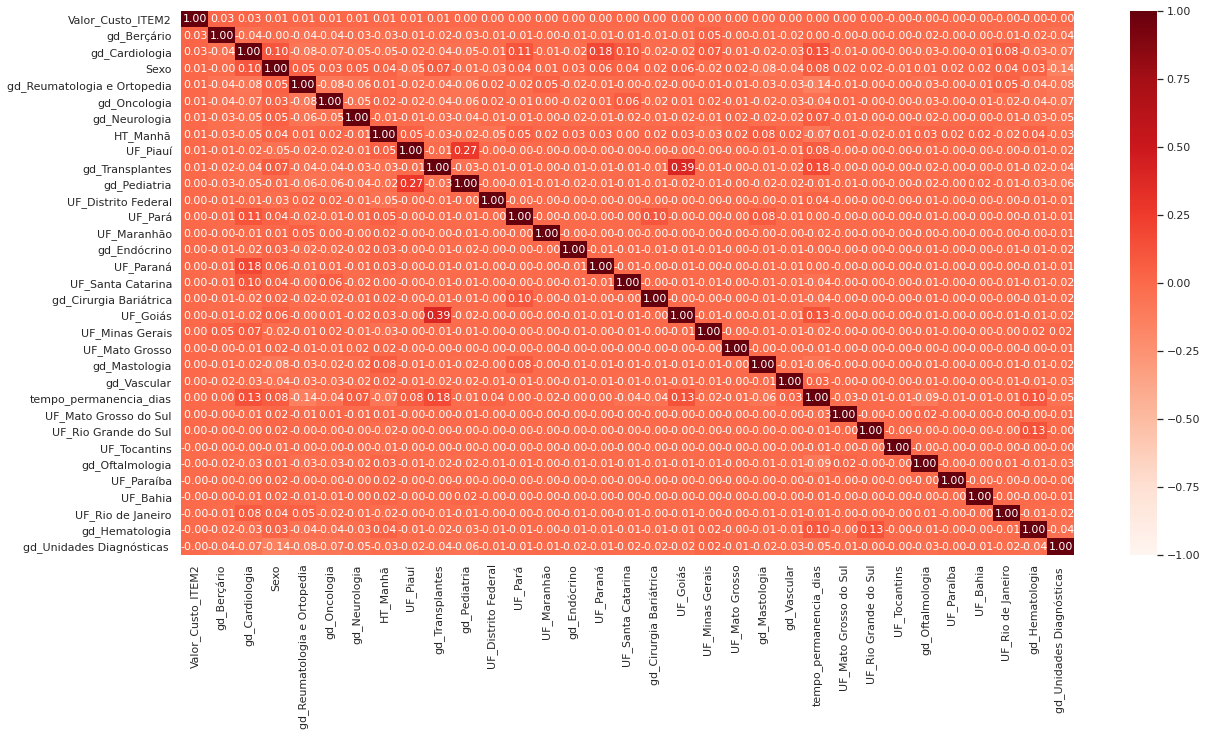

In [ ]:
correlations = df_an.corr()
k = 33
cols = correlations.nlargest(k, "Valor_Custo_ITEM2")["Valor_Custo_ITEM2"].index
cm = np.corrcoef(df_an[cols].values.T)
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.heatmap(cm, vmin = -1, vmax = 1, cmap = "Reds", cbar = True, annot = True, square = False, 
                 fmt = ".2f", annot_kws = {"size": 11}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [ ]:
df_an.columns = [j.strip().replace(' ', '_').replace('-', '_').lower() for j in df_an.columns]
df_an1.columns = [j.strip().replace(' ', '_').replace('-', '_').lower() for j in df_an1.columns]

In [ ]:
df_an.columns = [j.replace('\xa0', '_') for j in df_an.columns]
df_an1.columns = [j.replace('\xa0', '_') for j in df_an1.columns]

In [ ]:
df_an.shape

(408825, 50)

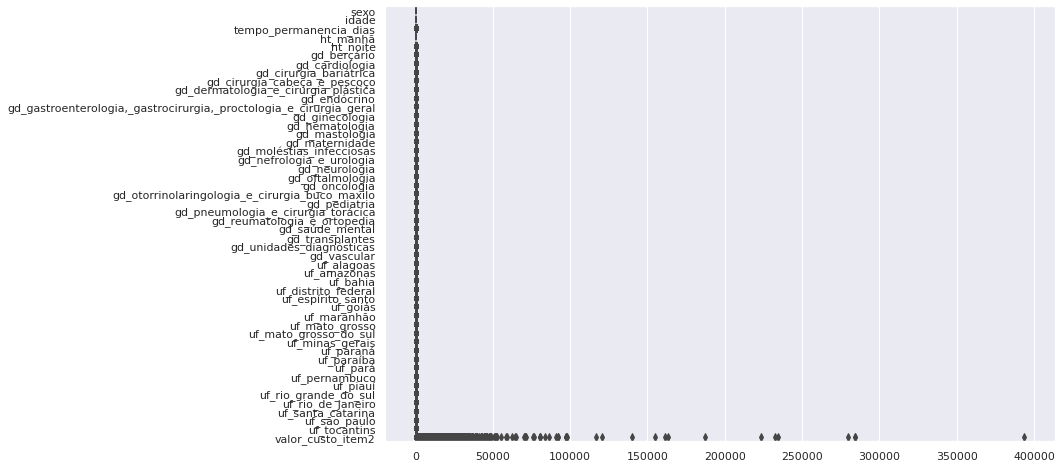

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot (Seaborn)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
sns.boxplot(data = df_an, orient = "h")

In [ ]:
df_an['valor_custo_item2'].describe()

count    408825.000000
mean        379.650385
std        2075.091746
min           0.038769
25%           8.529231
50%          24.153231
75%         113.593846
max      393595.465800
Name: valor_custo_item2, dtype: float64

In [ ]:
df_an.dtypes

sexo                                                                    int64
idade                                                                   int64
tempo_permanencia_dias                                                  int64
ht_manhã                                                                uint8
ht_noite                                                                uint8
gd_berçário                                                             uint8
gd_cardiologia                                                          uint8
gd_cirurgia_bariátrica                                                  uint8
gd_cirurgia_cabeça_e_pescoço                                            uint8
gd_dermatologia_e_cirurgia_plástica                                     uint8
gd_endócrino                                                            uint8
gd_gastroenterologia,_gastrocirurgia,_proctologia_e_cirurgia_geral      uint8
gd_ginecologia                                                  

In [ ]:
# Scaling (min / max target)
from sklearn.preprocessing import MinMaxScaler

array = df_an.values

# features [X] e label [y]
X = array[:, 0:49]
y = array[:, 49]

# Transformando os dados
transformer = MinMaxScaler(feature_range = (0, 393595.465800))
X_rescaled = transformer.fit_transform(X)

# Sumarizando os dados transformados
print("Dados originais:\n\n", X)
print("\nDados transformados:\n\n", X_rescaled)

Dados originais:

 [[ 1. 57. 11. ...  0.  1.  0.]
 [ 1. 57. 11. ...  0.  1.  0.]
 [ 1. 57. 11. ...  0.  1.  0.]
 ...
 [ 1. 61.  0. ...  0.  1.  0.]
 [ 0. 30.  3. ...  0.  1.  0.]
 [ 0. 30.  3. ...  0.  1.  0.]]

Dados transformados:

 [[393595.4658     213993.65130874  96212.22497333 ...      0.
  393595.4658          0.        ]
 [393595.4658     213993.65130874  96212.22497333 ...      0.
  393595.4658          0.        ]
 [393595.4658     213993.65130874  96212.22497333 ...      0.
  393595.4658          0.        ]
 ...
 [393595.4658     229278.9121165       0.         ...      0.
  393595.4658          0.        ]
 [     0.         110818.14085631  26239.69772    ...      0.
  393595.4658          0.        ]
 [     0.         110818.14085631  26239.69772    ...      0.
  393595.4658          0.        ]]


In [ ]:
print(X)

[[ 1. 57. 11. ...  0.  1.  0.]
 [ 1. 57. 11. ...  0.  1.  0.]
 [ 1. 57. 11. ...  0.  1.  0.]
 ...
 [ 1. 61.  0. ...  0.  1.  0.]
 [ 0. 30.  3. ...  0.  1.  0.]
 [ 0. 30.  3. ...  0.  1.  0.]]


In [ ]:
# Reconstruindo o DataFrame
df_an = pd.DataFrame()

df_an = pd.DataFrame({'Sexo': X_rescaled[:, 0],
 'idade': X_rescaled[:, 1],
 'tempo_permanencia_dias': X_rescaled[:, 2],
 'HT_Manhã': X_rescaled[:, 3],
 'HT_Noite': X_rescaled[:, 4],
 'gd_Berçário': X_rescaled[:, 5],
 'gd_Cardiologia': X_rescaled[:, 6],
 'gd_Cirurgia Bariátrica': X_rescaled[:, 7],
 'gd_Cirurgia Cabeça e Pescoço': X_rescaled[:, 8],
 'gd_Dermatologia e Cirurgia Plástica': X_rescaled[:, 9],
 'gd_Endócrino': X_rescaled[:, 10],
 'gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral': X_rescaled[:, 11],
 'gd_Ginecologia': X_rescaled[:, 12],
 'gd_Hematologia': X_rescaled[:, 13],
 'gd_Mastologia': X_rescaled[:, 14],
 'gd_Maternidade': X_rescaled[:, 15],
 'gd_Moléstias Infecciosas': X_rescaled[:, 16],
 'gd_Nefrologia e Urologia': X_rescaled[:, 17],
 'gd_Neurologia': X_rescaled[:, 18],
 'gd_Oftalmologia': X_rescaled[:, 19],
 'gd_Oncologia': X_rescaled[:, 20],
 'gd_Otorrinolaringologia e Cirurgia Buco-Maxilo ': X_rescaled[:, 21],
 'gd_Pediatria': X_rescaled[:, 22],
 'gd_Pneumologia e Cirurgia Torácica': X_rescaled[:, 23],
 'gd_Reumatologia e Ortopedia': X_rescaled[:, 24],
 'gd_Saúde Mental': X_rescaled[:, 25],
 'gd_Transplantes': X_rescaled[:, 26],
 'gd_Unidades Diagnósticas ': X_rescaled[:, 27],
 'gd_Vascular': X_rescaled[:, 28],
 'UF_Alagoas': X_rescaled[:, 29],
 'UF_Amazonas': X_rescaled[:, 30],
 'UF_Bahia': X_rescaled[:, 31],
 'UF_Distrito Federal': X_rescaled[:, 32],
 'UF_Espírito Santo': X_rescaled[:, 33],
 'UF_Goiás': X_rescaled[:, 34],
 'UF_Maranhão': X_rescaled[:, 35],
 'UF_Mato Grosso': X_rescaled[:, 36],
 'UF_Mato Grosso do Sul': X_rescaled[:, 37],
 'UF_Minas Gerais': X_rescaled[:, 38],
 'UF_Paraná': X_rescaled[:, 39],
 'UF_Paraíba': X_rescaled[:, 40],
 'UF_Pará': X_rescaled[:, 41],
 'UF_Pernambuco': X_rescaled[:, 42],
 'UF_Piauí': X_rescaled[:, 43],
 'UF_Rio Grande do Sul': X_rescaled[:, 44],
 'UF_Rio de Janeiro': X_rescaled[:, 45],
 'UF_Santa Catarina': X_rescaled[:, 46],
 'UF_São Paulo': X_rescaled[:, 47],
 'UF_Tocantins': X_rescaled[:, 48],
 'Valor_Custo_ITEM2': y})    
    
df_an.head(10)

,Sexo,idade,tempo_permanencia_dias,HT_Manhã,HT_Noite,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular,UF_Alagoas,UF_Amazonas,UF_Bahia,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Santa Catarina,UF_São Paulo,UF_Tocantins,Valor_Custo_ITEM2
0,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,11.475692
1,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,98.861538
2,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,24.153231
3,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,23.416615
4,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,14.926154
5,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,14.344615
6,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,42.491077
7,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,16.283077
8,393595.4658,217814.966511,78719.093160,393595.4658,0.0000,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,38.381538
9,393595.4658,217814.966511,78719.093160,393595.4658,0.0000,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,150.269539


In [ ]:
df_an.columns

Index(['Sexo', 'idade', 'tempo_permanencia_dias', 'HT_Manhã', 'HT_Noite',
       'gd_Berçário', 'gd_Cardiologia', 'gd_Cirurgia Bariátrica',
       'gd_Cirurgia Cabeça e Pescoço', 'gd_Dermatologia e Cirurgia Plástica',
       'gd_Endócrino',
       'gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral',
       'gd_Ginecologia', 'gd_Hematologia', 'gd_Mastologia', 'gd_Maternidade',
       'gd_Moléstias Infecciosas', 'gd_Nefrologia e Urologia', 'gd_Neurologia',
       'gd_Oftalmologia', 'gd_Oncologia',
       'gd_Otorrinolaringologia e Cirurgia Buco-Maxilo ', 'gd_Pediatria',
       'gd_Pneumologia e Cirurgia Torácica', 'gd_Reumatologia e Ortopedia',
       'gd_Saúde Mental', 'gd_Transplantes', 'gd_Unidades Diagnósticas ',
       'gd_Vascular', 'UF_Alagoas', 'UF_Amazonas', 'UF_Bahia',
       'UF_Distrito Federal', 'UF_Espírito Santo', 'UF_Goiás', 'UF_Maranhão',
       'UF_Mato Grosso', 'UF_Mato Grosso do Sul', 'UF_Minas Gerais',
       'UF_Paraná', 'UF_Paraíba', 'UF_Pará', 'UF

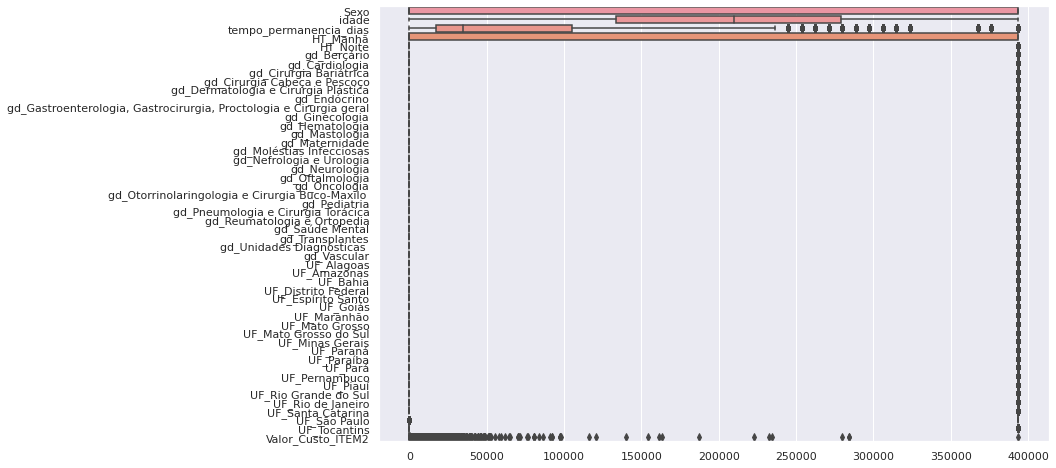

In [ ]:
# Boxplot (Seaborn)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
sns.boxplot(data = df_an, orient = "h")

In [ ]:
df_an.dtypes

Sexo                                                                  float64
idade                                                                 float64
tempo_permanencia_dias                                                float64
HT_Manhã                                                              float64
HT_Noite                                                              float64
gd_Berçário                                                           float64
gd_Cardiologia                                                        float64
gd_Cirurgia Bariátrica                                                float64
gd_Cirurgia Cabeça e Pescoço                                          float64
gd_Dermatologia e Cirurgia Plástica                                   float64
gd_Endócrino                                                          float64
gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral    float64
gd_Ginecologia                                                  

In [ ]:
df_an = df_an[['Sexo', 'idade', 'tempo_permanencia_dias', 'HT_Manhã', 'HT_Noite',
       'gd_Berçário', 'gd_Cardiologia', 'gd_Cirurgia Bariátrica',
       'gd_Cirurgia Cabeça e Pescoço', 'gd_Dermatologia e Cirurgia Plástica',
       'gd_Endócrino',
       'gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral',
       'gd_Ginecologia', 'gd_Hematologia', 'gd_Mastologia', 'gd_Maternidade',
       'gd_Moléstias Infecciosas', 'gd_Nefrologia e Urologia', 'gd_Neurologia',
       'gd_Oftalmologia', 'gd_Oncologia',
       'gd_Otorrinolaringologia e Cirurgia Buco-Maxilo ', 'gd_Pediatria',
       'gd_Pneumologia e Cirurgia Torácica', 'gd_Reumatologia e Ortopedia',
       'gd_Saúde Mental', 'gd_Transplantes', 'gd_Unidades Diagnósticas ',
       'gd_Vascular', 'UF_Alagoas', 'UF_Amazonas', 'UF_Bahia',
       'UF_Distrito Federal', 'UF_Espírito Santo', 'UF_Goiás', 'UF_Maranhão',
       'UF_Mato Grosso', 'UF_Mato Grosso do Sul', 'UF_Minas Gerais',
       'UF_Paraná', 'UF_Paraíba', 'UF_Pará', 'UF_Pernambuco', 'UF_Piauí',
       'UF_Rio Grande do Sul', 'UF_Rio de Janeiro', 'UF_Santa Catarina',
       'UF_São Paulo', 'UF_Tocantins', 'Valor_Custo_ITEM2']]

In [ ]:
#Definindo as features [X], o label [y] e o valor de seed para controlar a aleatoriedade

# features [X] e label [y]

array = df_an.values

X = array[:, 0:49]
y = array[:, 49]

In [ ]:
# Tratamento da aleatoriedade para garantir que os mesmos dados sejam sempre reproduzidos da mesma maneira
# Importante para garantir a justa comparação de performance entre os algoritmos de Machine Learning
seed = 1234

In [ ]:
df_an

,Sexo,idade,tempo_permanencia_dias,HT_Manhã,HT_Noite,gd_Berçário,gd_Cardiologia,gd_Cirurgia Bariátrica,gd_Cirurgia Cabeça e Pescoço,gd_Dermatologia e Cirurgia Plástica,gd_Endócrino,"gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral",gd_Ginecologia,gd_Hematologia,gd_Mastologia,gd_Maternidade,gd_Moléstias Infecciosas,gd_Nefrologia e Urologia,gd_Neurologia,gd_Oftalmologia,gd_Oncologia,gd_Otorrinolaringologia e Cirurgia Buco-Maxilo,gd_Pediatria,gd_Pneumologia e Cirurgia Torácica,gd_Reumatologia e Ortopedia,gd_Saúde Mental,gd_Transplantes,gd_Unidades Diagnósticas,gd_Vascular,UF_Alagoas,UF_Amazonas,UF_Bahia,UF_Distrito Federal,UF_Espírito Santo,UF_Goiás,UF_Maranhão,UF_Mato Grosso,UF_Mato Grosso do Sul,UF_Minas Gerais,UF_Paraná,UF_Paraíba,UF_Pará,UF_Pernambuco,UF_Piauí,UF_Rio Grande do Sul,UF_Rio de Janeiro,UF_Santa Catarina,UF_São Paulo,UF_Tocantins,Valor_Custo_ITEM2
0,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,11.475692
1,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,98.861538
2,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,24.153231
3,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,23.416615
4,393595.4658,213993.651309,96212.224973,0.0000,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,14.926154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408820,393595.4658,149031.292876,0.000000,393595.4658,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,52.958769
408821,393595.4658,229278.912117,0.000000,393595.4658,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,23.455385
408822,393595.4658,229278.912117,0.000000,393595.4658,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,0.348923
408823,0.0000,110818.140856,26239.697720,0.0000,393595.4658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393595.4658,0.0,72.420923


In [ ]:
# Calculando VIF
# (VIF) é uma medida de colinearidade entre variáveis ​​preditoras em uma regressão múltipla. 
# É calculado tomando a razão da variância de todos os betas de um determinado modelo dividido pela variana de um único beta se ele fosse ajustado sozinho.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = df_an.columns[0:49]

vif.round(1)

# Conforme esperado, a variável tp_INTERNADO tem um alto valor de VIF, tendo em vista que a sua natureza indica uma internação,  
# o que naturalmente acontece na preparação de procedimentos cirúrgicos. Diante da multicolinearidade, 
# a variável ​​em questão deve será removida, uma vez que a presença da multicolinearidade implica que a informação que 
# esta variável fornece sobre a resposta é redundante na presença das outras variáveis. Após a remoção recalcularemos o VIF.

,VIF Factor,features
0,2.1,Sexo
1,10.3,idade
2,2.8,tempo_permanencia_dias
3,3.1,HT_Manhã
4,2.0,HT_Noite
5,3.7,gd_Berçário
6,8.9,gd_Cardiologia
7,1.5,gd_Cirurgia Bariátrica
8,1.3,gd_Cirurgia Cabeça e Pescoço
9,5.5,gd_Dermatologia e Cirurgia Plástica


ranking das features:

1. feature 1 - idade (0.368055)
2. feature 2 - tempo_permanencia_dias (0.246742)
3. feature 5 - gd_Berçário (0.061999)
4. feature 6 - gd_Cardiologia (0.059643)
5. feature 0 - Sexo (0.053396)
6. feature 3 - HT_Manhã (0.052482)
7. feature 4 - HT_Noite (0.029387)
8. feature 47 - UF_São Paulo (0.013388)
9. feature 23 - gd_Pneumologia e Cirurgia Torácica (0.012636)
10. feature 35 - UF_Maranhão (0.010417)
11. feature 16 - gd_Moléstias Infecciosas (0.009767)
12. feature 20 - gd_Oncologia (0.008445)
13. feature 24 - gd_Reumatologia e Ortopedia (0.007686)
14. feature 18 - gd_Neurologia (0.007541)
15. feature 11 - gd_Gastroenterologia, Gastrocirurgia, Proctologia e Cirurgia geral (0.006630)
16. feature 27 - gd_Unidades Diagnósticas  (0.006265)
17. feature 22 - gd_Pediatria (0.005464)
18. feature 17 - gd_Nefrologia e Urologia (0.004901)
19. feature 26 - gd_Transplantes (0.003955)
20. feature 13 - gd_Hematologia (0.003388)
21. feature 10 - gd_Endócrino (0.003320)
22. feature

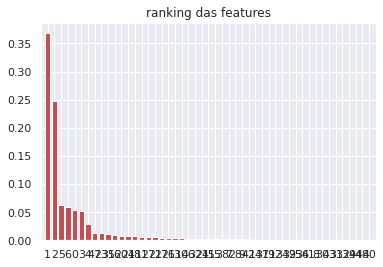

In [ ]:
# ExtraTreesRegressor

# Import dos Módulos
from sklearn.ensemble import ExtraTreesRegressor

# Criação do Modelo - Feature Selection
modelo = ExtraTreesRegressor(random_state=seed)
modelo.fit(X, y)

# Imprimindo os resultados
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

print("ranking das features:")
print()
for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], df_an.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("ranking das features")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

>1 mean=0.8680 se=0.011
>2 mean=0.8675 se=0.008
>3 mean=0.8673 se=0.006
>4 mean=0.8670 se=0.006
>5 mean=0.8658 se=0.005
>6 mean=0.8655 se=0.004
>7 mean=0.8651 se=0.004
>8 mean=0.8651 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8658 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8654 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


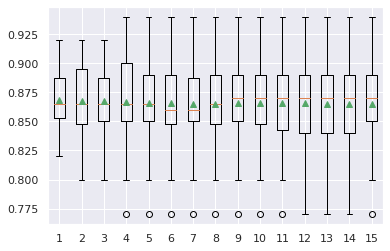

In [ ]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()


 -------------------

In [ ]:
# features [X] e label [y]

array = df_an.values

X = array[:, 0:49]
y = array[:, 49]

array1 = df_an1.values

X1 = array1[:, 0:48]
y1 = array1[:, 48]

In [ ]:
np.any(np.isnan(df_an1))

True

In [ ]:
np.all(np.isfinite(df_an))

True

In [ ]:
df_an1 = df_an1.fillna(method='ffill')

In [ ]:
# features [X] e label [y]

array = df_an.values

X = array[:, 0:49]
y = array[:, 49]

array1 = df_an1.values

X1 = array1[:, 0:48]
y1 = array1[:, 48]

df_an1 = df_an1.dropna()

In [ ]:
float_col = df_an1.select_dtypes(include=['float64']) # This will select float columns only
>>> # list(float_col.columns.values)

>>> for col in float_col.columns.values:
...     df_an1[col] = df_an1[col].astype('int64', errors='ignore')

In [ ]:
# features [X] e label [y]

array = df_an.values

X = array[:, 0:49]
y = array[:, 49]

df_an1 = df_an1.dropna()

array1 = df_an1.values

X1 = array1[:, 0:48]
y1 = array1[:, 48]

df_an1.dtypes

IndexError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Criando o modelo
modelo_opt = KNeighborsRegressor(n_neighbors= 6, weights='uniform')

# Treinamento do modelo otimizado em todo o dataset
modelo_opt.fit(X, y)

# Fazendo as previsões
y_pred_opt = modelo_opt.predict(X)

# Imprimindo a  métrica 

sum(y_pred_opt)

214170852.2231324

In [ ]:
y_pred_opt = modelo_opt.predict(X1)